In [1]:
import numpy as np

import matplotlib.pyplot as plt
import sounddevice as sd
from math import pi

%matplotlib inline

In [2]:
freq = 440 
duration = 1 #sec
fs = 48000 # typical 

t = np.linspace(0, duration, fs)

(0.0, 50.0)

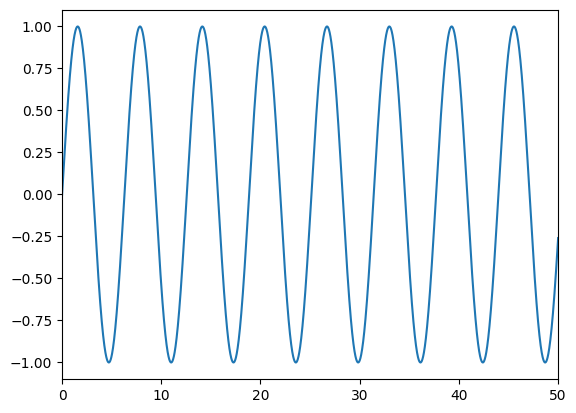

In [3]:
t=np.linspace(-20*2*pi, 20*2*pi, 2**14)
# t=np.linspace(-20*2*pi, 20*2*pi, 3**9+6)
y=np.sin(t)

plt.plot(t,y)
plt.xlim(0,50)

Text(0, 0.5, 'signal, arb.units')

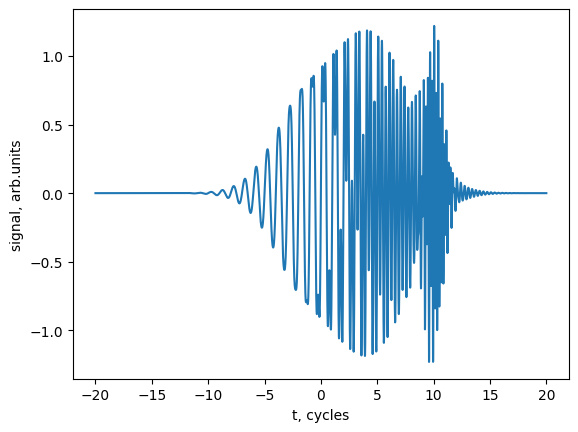

In [4]:
# generate the signal
nofts=1000
t=np.linspace(-20*2*pi, 20*2*pi, 2**14)
# t=np.linspace(-20*2*pi, 20*2*pi, 3**9+6)
y=np.sin(t)*np.exp(-t**2/2/20**2)
y=y+np.sin(3*t)*np.exp(-(t-5*2*pi)**2/2/20**2)
y=y+np.sin(5.5*t)*np.exp(-(t-10*2*pi)**2/2/5**2)

plt.plot(t/2/pi,y)

plt.xlabel('t, cycles')
plt.ylabel('signal, arb.units')

Text(0, 0.5, 'Power spectrum, arb. units')

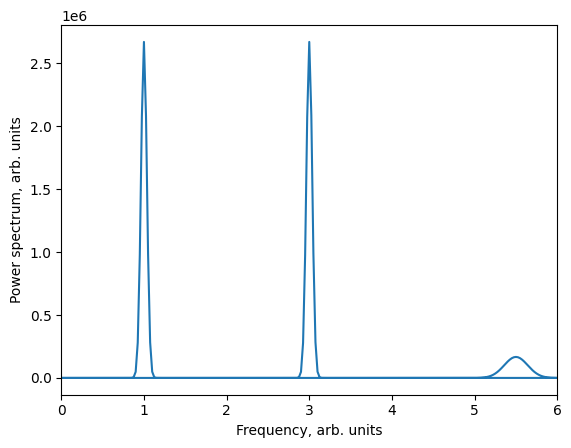

In [5]:
sp=np.fft.fft(y)
w=np.fft.fftfreq(len(y), d=(t[1]-t[0])/2/pi)
Y=np.exp(-(w-3)**2/2/0.5**2)


plt.plot(w, abs(sp)**2)
# plt.plot(w, Y)

plt.xlim(0,6)
plt.xlabel('Frequency, arb. units')
plt.ylabel('Power spectrum, arb. units')


(0.0, 6.0)

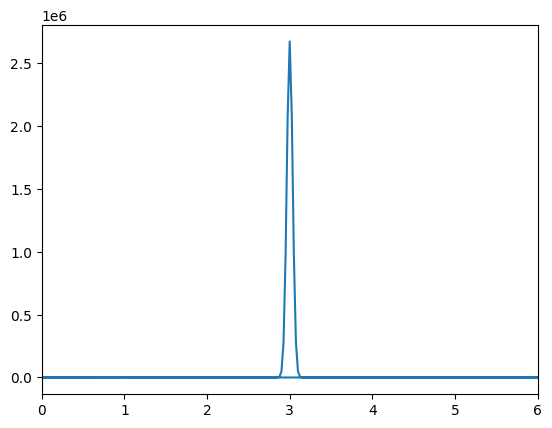

In [6]:
Y=1*np.exp(-(w-3)**2/2/0.5**2)
plt.plot(w, Y*abs(sp)**2)
plt.xlim(0,6)

In [7]:
w

array([ 0.        ,  0.02499847,  0.04999695, ..., -0.07499542,
       -0.04999695, -0.02499847])

In [8]:
FFT_real = Y*(sp).real
iFFT = np.fft.ifft(FFT_real).real.astype(dtype=np.float64)
# ifft = np.fft.fft(Y*abs(sp)**2)

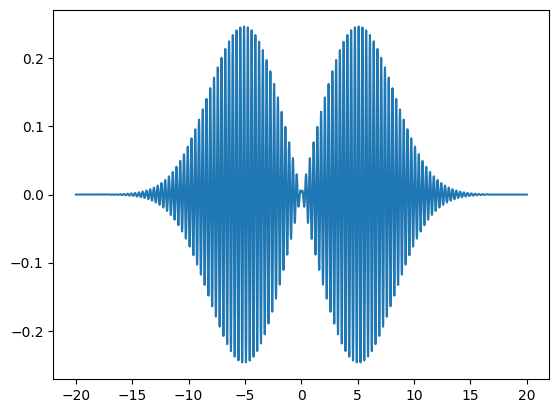

In [9]:
plt.plot(t/2/pi,iFFT)

Text(0, 0.5, 'signal, arb.units')

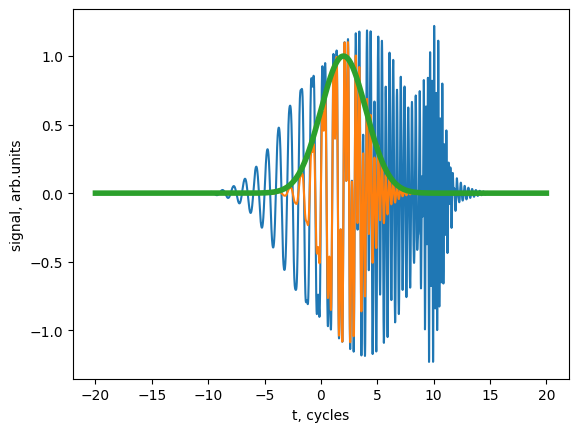

In [10]:
# windowed Fourier transform (Gabor transform, spectrogram)

window_width=2*2*pi
window_position=2*2*pi
window_function=np.exp(-(t-window_position)**2/2/window_width**2)

y_window=y * window_function

plt.plot(t/2/pi, y)
plt.plot(t/2/pi, y_window)
plt.plot(t/2/pi, window_function, lw=4)
plt.xlabel('t, cycles')
plt.ylabel('signal, arb.units')
# now do the same for different window positions and plot 2D graph
# x_axis is window position
# y_axis is frequency
# color axis represents the power spectrum

Text(0, 0.5, 'Power spectrum, arb. units')

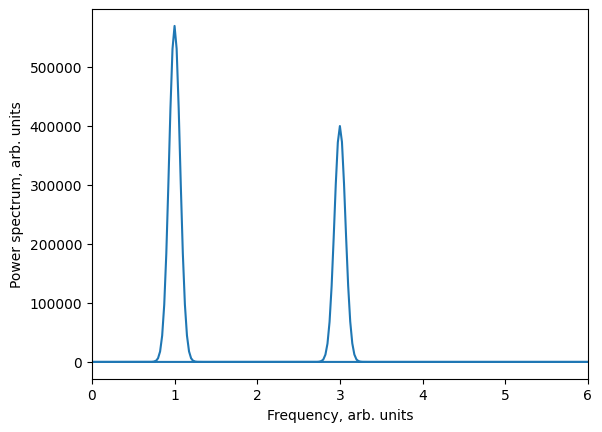

In [7]:
# Fourier spectrum
sp=np.fft.fft(y_window)
w=np.fft.fftfreq(len(y), d=(t[1]-t[0])/2/pi)
plt.plot(w, abs(sp)**2)
plt.xlim(0,6)
plt.xlabel('Frequency, arb. units')
plt.ylabel('Power spectrum, arb. units')

In [40]:


def get_specgram(y,nwindowsteps=500):
    window_width=2*2*pi
    w=np.fft.fftfreq(len(y), d=(t[1]-t[0])/2/pi)
    sp_list = []
    w_list = []
    for i in np.linspace(-20,20,nwindowsteps):
        window_position=i*2*pi
        window_function=np.exp(-(t-window_position)**2/2/window_width**2)
        y_window=y * window_function
        sp=np.fft.fft(y_window)
        sp_list.append(sp)
    
    return abs(np.array(sp_list).T)**2

Text(0, 0.5, 'Frequency, arb. units')

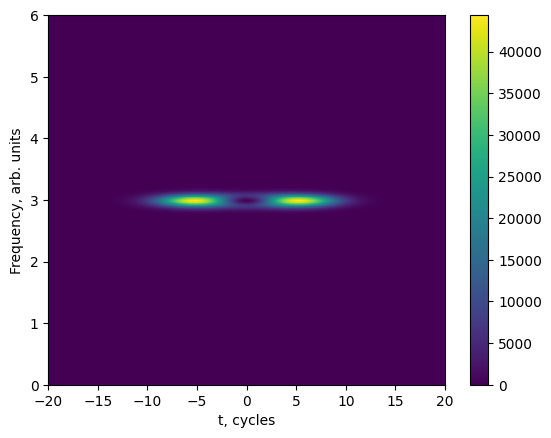

In [41]:
sp = get_specgram(iFFT)
plt.imshow(sp, aspect='auto', extent=[-20,20,0,2*max(w)])
plt.ylim(0,6)
plt.colorbar()
plt.xlabel('t, cycles')
plt.ylabel('Frequency, arb. units')

In [10]:
# plt.imshow(sp, aspect='auto', extent=[-20,20,0,2*max(w)])
# plt.ylim(0,6)
# plt.colorbar()

Text(0, 0.5, 'signal, arb.units')

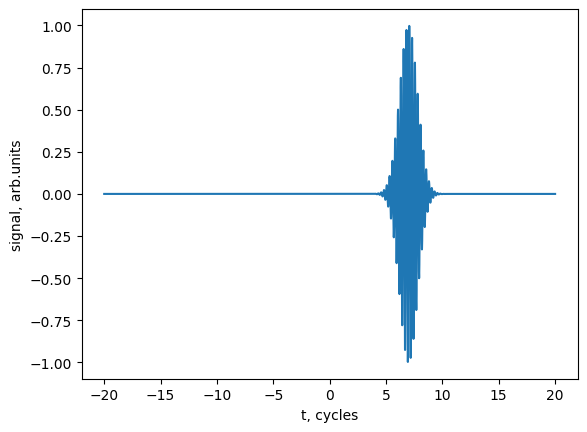

In [11]:
y1=np.sin(4*t)*np.exp(-(t-7*2*pi)**2/2/5**2)

plt.plot(t/2/pi,y1)

plt.xlabel('t, cycles')
plt.ylabel('signal, arb.units')

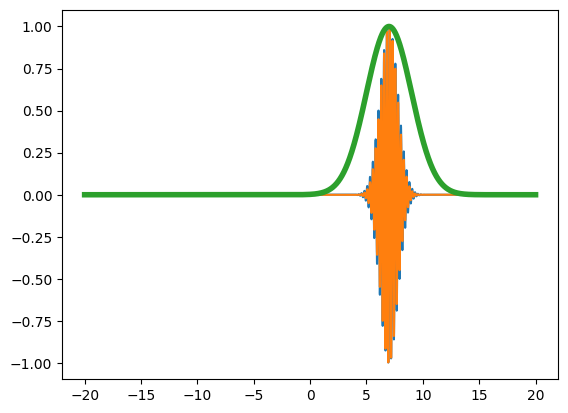

In [12]:
window_width=2*2*pi
window_position=7*2*pi
window_function=np.exp(-(t-window_position)**2/2/window_width**2)

y_window=y1 * window_function

plt.plot(t/2/pi, y1)
plt.plot(t/2/pi, y_window)
plt.plot(t/2/pi, window_function, lw=4)

Text(0, 0.5, 'Power spectrum, arb. units')

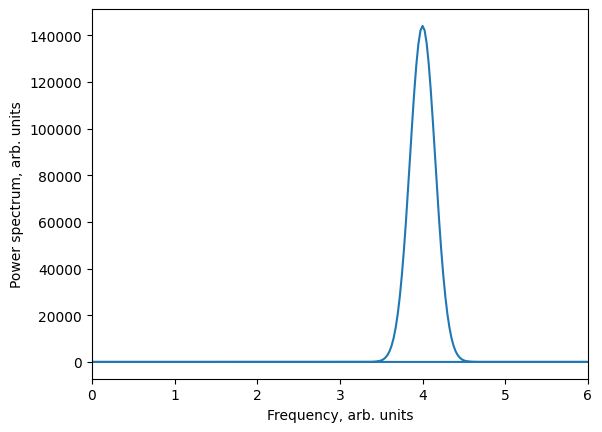

In [13]:
sp=np.fft.fft(y_window)
w=np.fft.fftfreq(len(y), d=(t[1]-t[0])/2/pi)
plt.plot(w, abs(sp)**2)
plt.xlim(0,6)
plt.xlabel('Frequency, arb. units')
plt.ylabel('Power spectrum, arb. units')

Text(0, 0.5, 'signal, arb.units')

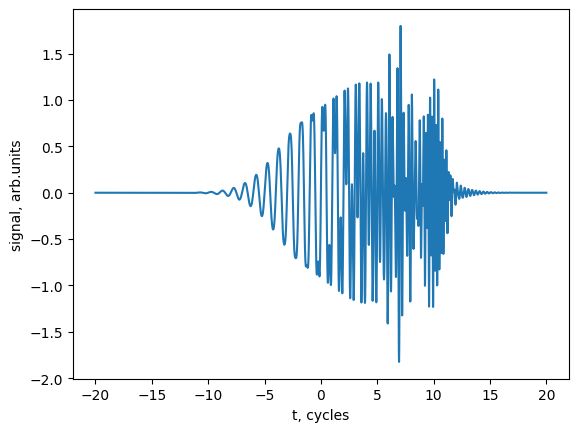

In [14]:
y = y+y1

plt.plot(t/2/pi,y)

plt.xlabel('t, cycles')
plt.ylabel('signal, arb.units')

In [15]:
def get_specgram(y,nwindowsteps=1000, a = -20, b =20):
    window_width=2*2*pi
    w=np.fft.fftfreq(len(y), d=(t[1]-t[0])/2/pi)
    sp_list = []
    w_list = []
    for i in np.linspace(a,b,nwindowsteps):
        window_position=i*2*pi
        window_function=np.exp(-(t-window_position)**2/2/window_width**2)
        y_window=y * window_function
        sp=np.fft.fft(y_window)
        sp_list.append(sp)
    
    return abs(np.array(sp_list).T)**2

(16384, 500)


Text(0, 0.5, 'Frequency, arb. units')

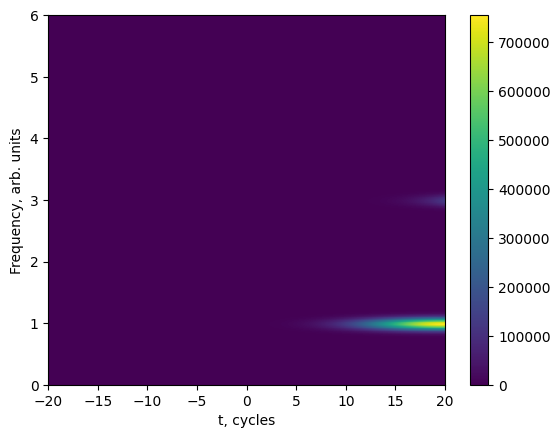

In [16]:
t=np.linspace(-20*2*pi, 20*2*pi, 2**14)

y=np.sin(t)*np.exp(-t**2/2/20**2)
y=y+np.sin(3*t)*np.exp(-(t-5*2*pi)**2/2/20**2)
y=y+np.sin(5.5*t)*np.exp(-(t-10*2*pi)**2/2/5**2)
y= y+ np.sin(4*t)*np.exp(-(t-7*2*pi)**2/2/10**2)

sp1 = get_specgram(y, a =-20, b=0, nwindowsteps=500)
print(sp1.shape)
plt.imshow(sp1, aspect='auto', extent=[-20,20,0,2*max(w)])
plt.ylim(0,6)
plt.colorbar()
plt.xlabel('t, cycles')
plt.ylabel('Frequency, arb. units')


(16384, 1000)


Text(0, 0.5, 'Frequency, arb. units')

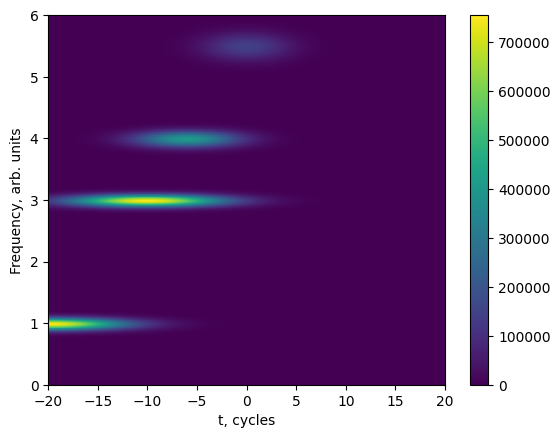

In [20]:

sp2 = get_specgram(y, a =0, b=20, nwindowsteps=1000)
print(sp2.shape)
plt.imshow(sp2, aspect='auto', extent=[-20,20,0,2*max(w)])
plt.ylim(0,6)
plt.colorbar()
plt.xlabel('t, cycles')
plt.ylabel('Frequency, arb. units')



(16384, 1000)


Text(0, 0.5, 'Frequency, arb. units')

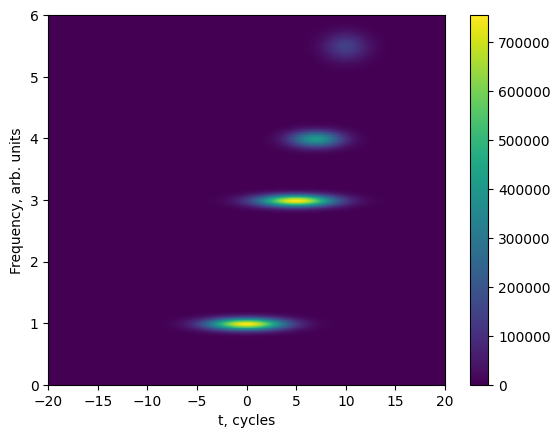

In [54]:

# sp = get_specgram(y)
sp = np.hstack((sp1,sp2))
print(sp.shape)
plt.imshow(sp, aspect='auto', extent=[-20,20,0,2*max(w)])
plt.ylim(0,6)
plt.colorbar()
plt.xlabel('t, cycles')
plt.ylabel('Frequency, arb. units')

In [49]:
import timeit

In [32]:

code_to_test = '''
import numpy as np

import matplotlib.pyplot as plt
import sounddevice as sd
from math import pi

def get_specgram(y,nwindowsteps=1000):
    window_width=2*2*pi
    w=np.fft.fftfreq(len(y), d=(t[1]-t[0])/2/pi)
    sp_list = []
    w_list = []
    for i in np.linspace(-20,20,nwindowsteps):
        window_position=i*2*pi
        window_function=np.exp(-(t-window_position)**2/2/window_width**2)
        y_window=y * window_function
        sp=np.fft.fft(y_window)
        sp_list.append(sp)
    
    return abs(np.array(sp_list).T)**2
    
t=np.linspace(-20*2*pi, 20*2*pi, 2**(14))

y=np.sin(t)*np.exp(-t**2/2/20**2)
y=y+np.sin(3*t)*np.exp(-(t-5*2*pi)**2/2/20**2)
y=y+np.sin(5.5*t)*np.exp(-(t-10*2*pi)**2/2/5**2)
y= y+ np.sin(4*t)*np.exp(-(t-7*2*pi)**2/2/10**2)
sp = get_specgram(y)
'''

elapsed_time = timeit.timeit(code_to_test, number=5)/5
print(elapsed_time)

1.475935692799999


In [50]:
code_to_test = '''
import numpy as np

import matplotlib.pyplot as plt
import sounddevice as sd
from math import pi

def get_specgram(y,nwindowsteps=1000):
    window_width=2*2*pi
    w=np.fft.fftfreq(len(y), d=(t[1]-t[0])/2/pi)
    sp_list = []
    w_list = []
    for i in np.linspace(-20,20,nwindowsteps):
        window_position=i*2*pi
        window_function=np.exp(-(t-window_position)**2/2/window_width**2)
        y_window=y * window_function
        sp=np.fft.fft(y_window)
        sp_list.append(sp)
    
    return abs(np.array(sp_list).T)**2
    
t=np.linspace(-20*2*pi, 20*2*pi, 2**14+1)

y=np.sin(t)*np.exp(-t**2/2/20**2)
y=y+np.sin(3*t)*np.exp(-(t-5*2*pi)**2/2/20**2)
y=y+np.sin(5.5*t)*np.exp(-(t-10*2*pi)**2/2/5**2)
y= y+ np.sin(4*t)*np.exp(-(t-7*2*pi)**2/2/10**2)
sp = get_specgram(y)
'''

elapsed_time = timeit.timeit(code_to_test, number=5)/5
print(elapsed_time)

2.384000645399965


In [51]:
code_to_test = '''
import numpy as np

import matplotlib.pyplot as plt
import sounddevice as sd
from math import pi

def get_specgram(y,nwindowsteps=1000):
    window_width=2*2*pi
    w=np.fft.fftfreq(len(y), d=(t[1]-t[0])/2/pi)
    sp_list = []
    w_list = []
    for i in np.linspace(-20,20,nwindowsteps):
        window_position=i*2*pi
        window_function=np.exp(-(t-window_position)**2/2/window_width**2)
        y_window=y * window_function
        sp=np.fft.fft(y_window)
        sp_list.append(sp)
    
    return abs(np.array(sp_list).T)**2
    
t=np.linspace(-20*2*pi, 20*2*pi, 2**14+2)

y=np.sin(t)*np.exp(-t**2/2/20**2)
y=y+np.sin(3*t)*np.exp(-(t-5*2*pi)**2/2/20**2)
y=y+np.sin(5.5*t)*np.exp(-(t-10*2*pi)**2/2/5**2)
y= y+ np.sin(4*t)*np.exp(-(t-7*2*pi)**2/2/10**2)
sp = get_specgram(y)
'''

elapsed_time = timeit.timeit(code_to_test, number=5)/5
print(elapsed_time)

4.633594807600002


In [52]:
code_to_test = '''
import numpy as np

import matplotlib.pyplot as plt
import sounddevice as sd
from math import pi

def get_specgram(y,nwindowsteps=1000):
    window_width=2*2*pi
    w=np.fft.fftfreq(len(y), d=(t[1]-t[0])/2/pi)
    sp_list = []
    w_list = []
    for i in np.linspace(-20,20,nwindowsteps):
        window_position=i*2*pi
        window_function=np.exp(-(t-window_position)**2/2/window_width**2)
        y_window=y * window_function
        sp=np.fft.fft(y_window)
        sp_list.append(sp)
    
    return abs(np.array(sp_list).T)**2
    
t=np.linspace(-20*2*pi, 20*2*pi, 2**14+3)

y=np.sin(t)*np.exp(-t**2/2/20**2)
y=y+np.sin(3*t)*np.exp(-(t-5*2*pi)**2/2/20**2)
y=y+np.sin(5.5*t)*np.exp(-(t-10*2*pi)**2/2/5**2)
y= y+ np.sin(4*t)*np.exp(-(t-7*2*pi)**2/2/10**2)
sp = get_specgram(y)
'''

elapsed_time = timeit.timeit(code_to_test, number=5)/5
print(elapsed_time)

4.507315859800019


In [53]:
code_to_test = '''
import numpy as np

import matplotlib.pyplot as plt
import sounddevice as sd
from math import pi

def get_specgram(y,nwindowsteps=1000):
    window_width=2*2*pi
    w=np.fft.fftfreq(len(y), d=(t[1]-t[0])/2/pi)
    sp_list = []
    w_list = []
    for i in np.linspace(-20,20,nwindowsteps):
        window_position=i*2*pi
        window_function=np.exp(-(t-window_position)**2/2/window_width**2)
        y_window=y * window_function
        sp=np.fft.fft(y_window)
        sp_list.append(sp)
    
    return abs(np.array(sp_list).T)**2
    
t=np.linspace(-20*2*pi, 20*2*pi, 2**14+4)

y=np.sin(t)*np.exp(-t**2/2/20**2)
y=y+np.sin(3*t)*np.exp(-(t-5*2*pi)**2/2/20**2)
y=y+np.sin(5.5*t)*np.exp(-(t-10*2*pi)**2/2/5**2)
y= y+ np.sin(4*t)*np.exp(-(t-7*2*pi)**2/2/10**2)
sp = get_specgram(y)
'''

elapsed_time = timeit.timeit(code_to_test, number=5)/5
print(elapsed_time)

4.262188852400004


In [54]:
code_to_test = '''
import numpy as np

import matplotlib.pyplot as plt
import sounddevice as sd
from math import pi

def get_specgram(y,nwindowsteps=1000):
    window_width=2*2*pi
    w=np.fft.fftfreq(len(y), d=(t[1]-t[0])/2/pi)
    sp_list = []
    w_list = []
    for i in np.linspace(-20,20,nwindowsteps):
        window_position=i*2*pi
        window_function=np.exp(-(t-window_position)**2/2/window_width**2)
        y_window=y * window_function
        sp=np.fft.fft(y_window)
        sp_list.append(sp)
    
    return abs(np.array(sp_list).T)**2
    
t=np.linspace(-20*2*pi, 20*2*pi, 2**14+5)

y=np.sin(t)*np.exp(-t**2/2/20**2)
y=y+np.sin(3*t)*np.exp(-(t-5*2*pi)**2/2/20**2)
y=y+np.sin(5.5*t)*np.exp(-(t-10*2*pi)**2/2/5**2)
y= y+ np.sin(4*t)*np.exp(-(t-7*2*pi)**2/2/10**2)
sp = get_specgram(y)
'''

elapsed_time = timeit.timeit(code_to_test, number=5)/5
print(elapsed_time)

4.217286417800006


In [38]:
code_to_test = '''
import numpy as np

import matplotlib.pyplot as plt
import sounddevice as sd
from math import pi

def get_specgram(y,nwindowsteps=1000):
    window_width=2*2*pi
    w=np.fft.fftfreq(len(y), d=(t[1]-t[0])/2/pi)
    sp_list = []
    w_list = []
    for i in np.linspace(-20,20,nwindowsteps):
        window_position=i*2*pi
        window_function=np.exp(-(t-window_position)**2/2/window_width**2)
        y_window=y * window_function
        sp=np.fft.fft(y_window)
        sp_list.append(sp)
    
    return abs(np.array(sp_list).T)**2
    
t=np.linspace(-20*2*pi, 20*2*pi, 2**14-1)

y=np.sin(t)*np.exp(-t**2/2/20**2)
y=y+np.sin(3*t)*np.exp(-(t-5*2*pi)**2/2/20**2)
y=y+np.sin(5.5*t)*np.exp(-(t-10*2*pi)**2/2/5**2)
y= y+ np.sin(4*t)*np.exp(-(t-7*2*pi)**2/2/10**2)
sp = get_specgram(y)
'''

elapsed_time = timeit.timeit(code_to_test, number=5)/5
print(elapsed_time)

2.4257980832000157


In [39]:
code_to_test = '''
import numpy as np

import matplotlib.pyplot as plt
import sounddevice as sd
from math import pi

def get_specgram(y,nwindowsteps=1000):
    window_width=2*2*pi
    w=np.fft.fftfreq(len(y), d=(t[1]-t[0])/2/pi)
    sp_list = []
    w_list = []
    for i in np.linspace(-20,20,nwindowsteps):
        window_position=i*2*pi
        window_function=np.exp(-(t-window_position)**2/2/window_width**2)
        y_window=y * window_function
        sp=np.fft.fft(y_window)
        sp_list.append(sp)
    
    return abs(np.array(sp_list).T)**2
    
t=np.linspace(-20*2*pi, 20*2*pi, 2**14-2)

y=np.sin(t)*np.exp(-t**2/2/20**2)
y=y+np.sin(3*t)*np.exp(-(t-5*2*pi)**2/2/20**2)
y=y+np.sin(5.5*t)*np.exp(-(t-10*2*pi)**2/2/5**2)
y= y+ np.sin(4*t)*np.exp(-(t-7*2*pi)**2/2/10**2)
sp = get_specgram(y)
'''

elapsed_time = timeit.timeit(code_to_test, number=5)/5
print(elapsed_time)

4.024559099199996


In [46]:
code_to_test = '''
import numpy as np

import matplotlib.pyplot as plt
import sounddevice as sd
from math import pi

def get_specgram(y,nwindowsteps=1000):
    window_width=2*2*pi
    w=np.fft.fftfreq(len(y), d=(t[1]-t[0])/2/pi)
    sp_list = []
    w_list = []
    for i in np.linspace(-20,20,nwindowsteps):
        window_position=i*2*pi
        window_function=np.exp(-(t-window_position)**2/2/window_width**2)
        y_window=y * window_function
        sp=np.fft.fft(y_window)
        sp_list.append(sp)
    
    return abs(np.array(sp_list).T)**2
    
t=np.linspace(-20*2*pi, 20*2*pi, 2**14-3)

y=np.sin(t)*np.exp(-t**2/2/20**2)
y=y+np.sin(3*t)*np.exp(-(t-5*2*pi)**2/2/20**2)
y=y+np.sin(5.5*t)*np.exp(-(t-10*2*pi)**2/2/5**2)
y= y+ np.sin(4*t)*np.exp(-(t-7*2*pi)**2/2/10**2)
sp = get_specgram(y)
'''

elapsed_time = timeit.timeit(code_to_test, number=5)/5
print(elapsed_time)

4.244243980800002


In [55]:
code_to_test = '''
import numpy as np

import matplotlib.pyplot as plt
import sounddevice as sd
from math import pi

def get_specgram(y,nwindowsteps=1000):
    window_width=2*2*pi
    w=np.fft.fftfreq(len(y), d=(t[1]-t[0])/2/pi)
    sp_list = []
    w_list = []
    for i in np.linspace(-20,20,nwindowsteps):
        window_position=i*2*pi
        window_function=np.exp(-(t-window_position)**2/2/window_width**2)
        y_window=y * window_function
        sp=np.fft.fft(y_window)
        sp_list.append(sp)
    
    return abs(np.array(sp_list).T)**2
    
t=np.linspace(-20*2*pi, 20*2*pi, 2**14-4)

y=np.sin(t)*np.exp(-t**2/2/20**2)
y=y+np.sin(3*t)*np.exp(-(t-5*2*pi)**2/2/20**2)
y=y+np.sin(5.5*t)*np.exp(-(t-10*2*pi)**2/2/5**2)
y= y+ np.sin(4*t)*np.exp(-(t-7*2*pi)**2/2/10**2)
sp = get_specgram(y)
'''

elapsed_time = timeit.timeit(code_to_test, number=5)/5
print(elapsed_time)

1.5583301108000343


In [48]:
code_to_test = '''
import numpy as np

import matplotlib.pyplot as plt
import sounddevice as sd
from math import pi

def get_specgram(y,nwindowsteps=1000):
    window_width=2*2*pi
    w=np.fft.fftfreq(len(y), d=(t[1]-t[0])/2/pi)
    sp_list = []
    w_list = []
    for i in np.linspace(-20,20,nwindowsteps):
        window_position=i*2*pi
        window_function=np.exp(-(t-window_position)**2/2/window_width**2)
        y_window=y * window_function
        sp=np.fft.fft(y_window)
        sp_list.append(sp)
    
    return abs(np.array(sp_list).T)**2
    
t=np.linspace(-20*2*pi, 20*2*pi, 2**14-5)

y=np.sin(t)*np.exp(-t**2/2/20**2)
y=y+np.sin(3*t)*np.exp(-(t-5*2*pi)**2/2/20**2)
y=y+np.sin(5.5*t)*np.exp(-(t-10*2*pi)**2/2/5**2)
y= y+ np.sin(4*t)*np.exp(-(t-7*2*pi)**2/2/10**2)
sp = get_specgram(y)
'''

elapsed_time = timeit.timeit(code_to_test, number=5)/5
print(elapsed_time)

4.047403476399995
